In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import data_loader

df = data_loader.load_bank_data('bank_data.csv')
print("\n--- First 5 Rows of the Corrected Dataset ---")
print(df.head())
    
print("\n--- Corrected Dataset Information ---")
print(df.info())

sns.set(style="whitegrid")

Dataset loaded successfully!

--- First 5 Rows of the Corrected Dataset ---
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexiste

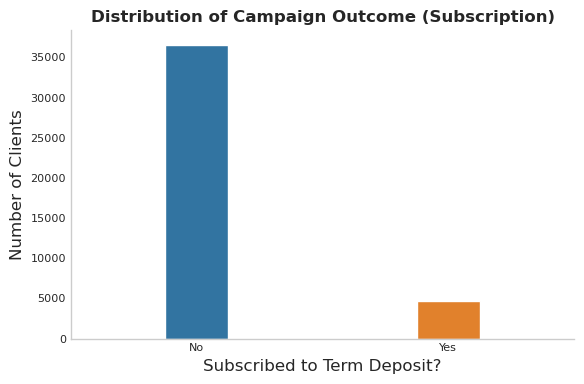

In [35]:
plt.figure(figsize=(6, 4))
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})
ax = sns.countplot(x='y', hue='y', data=df, palette=['#1f77b4', '#ff7f0e'], legend=False, width=0.25)

ax.set_title('Distribution of Campaign Outcome (Subscription)', fontsize=12, fontweight = 'bold')
ax.set_xlabel('Subscribed to Term Deposit?')
ax.set_ylabel('Number of Clients')

ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.grid(False)
ax.set_axisbelow(True)

sns.despine()

plt.tight_layout()
plt.show()

--- Histograms for Numerical Features ---


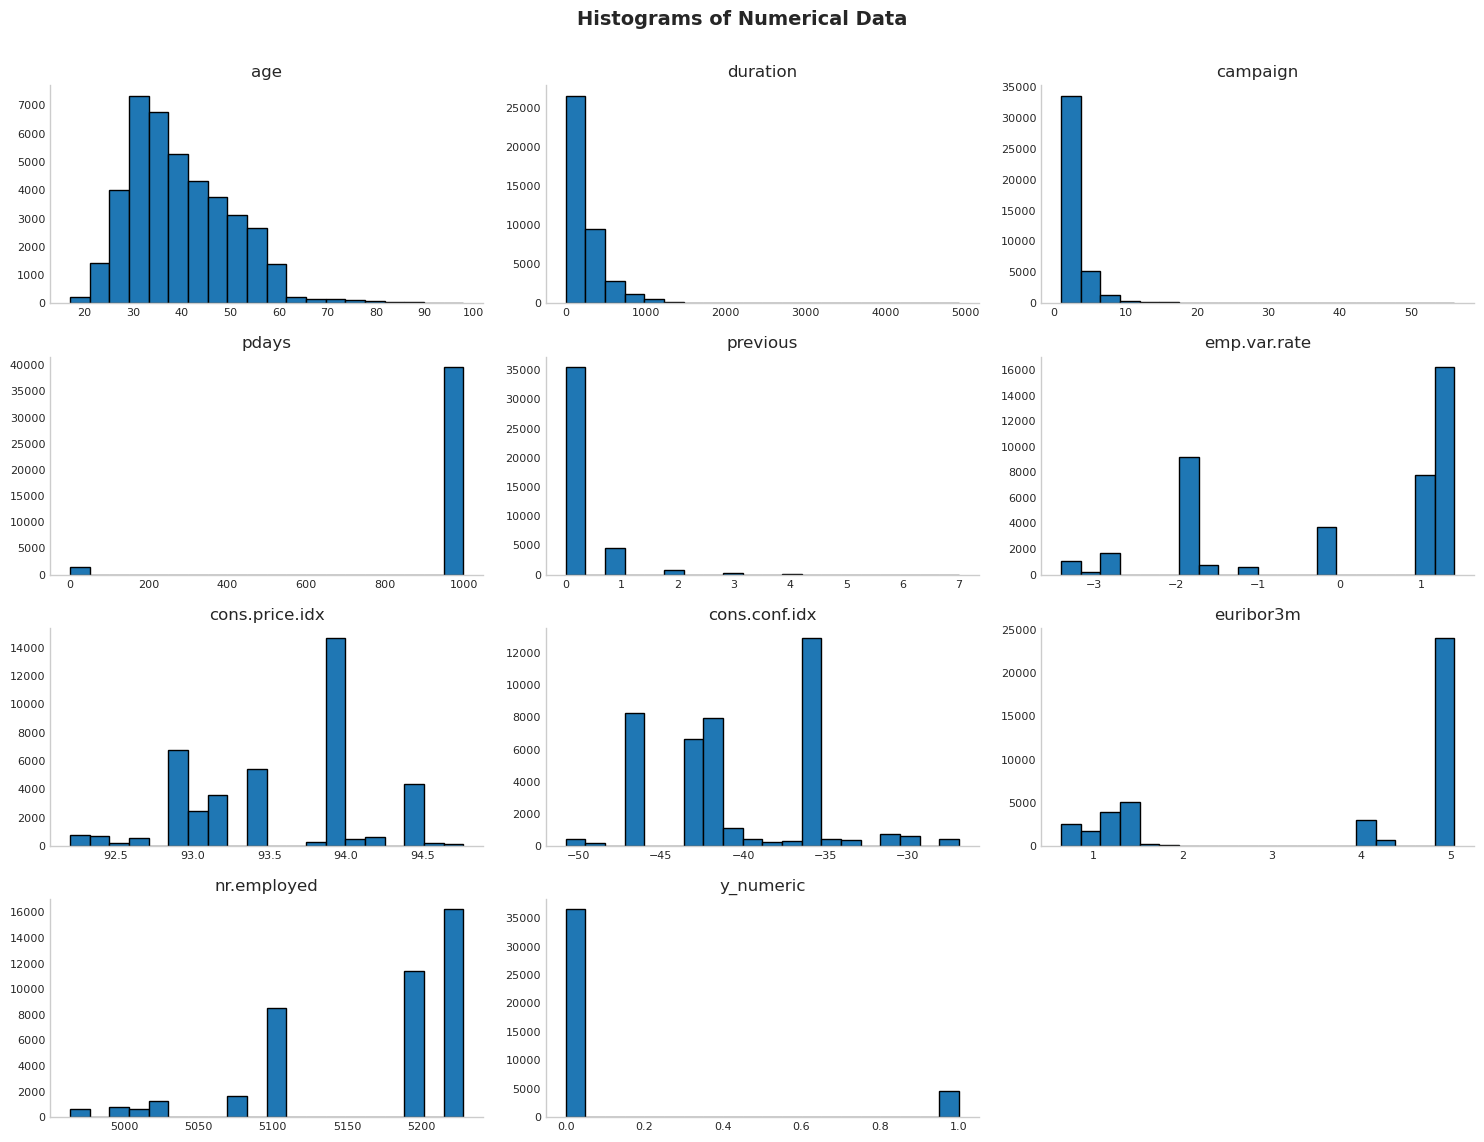

In [32]:
print("--- Histograms for Numerical Features ---")

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

axarr = df.hist(figsize=(15, 12), bins=20, color='#1f77b4', edgecolor='black')

for ax in axarr.flatten():
    ax.grid(False)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

plt.suptitle('Histograms of Numerical Data', fontsize=14, fontweight='bold', x=0.5, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

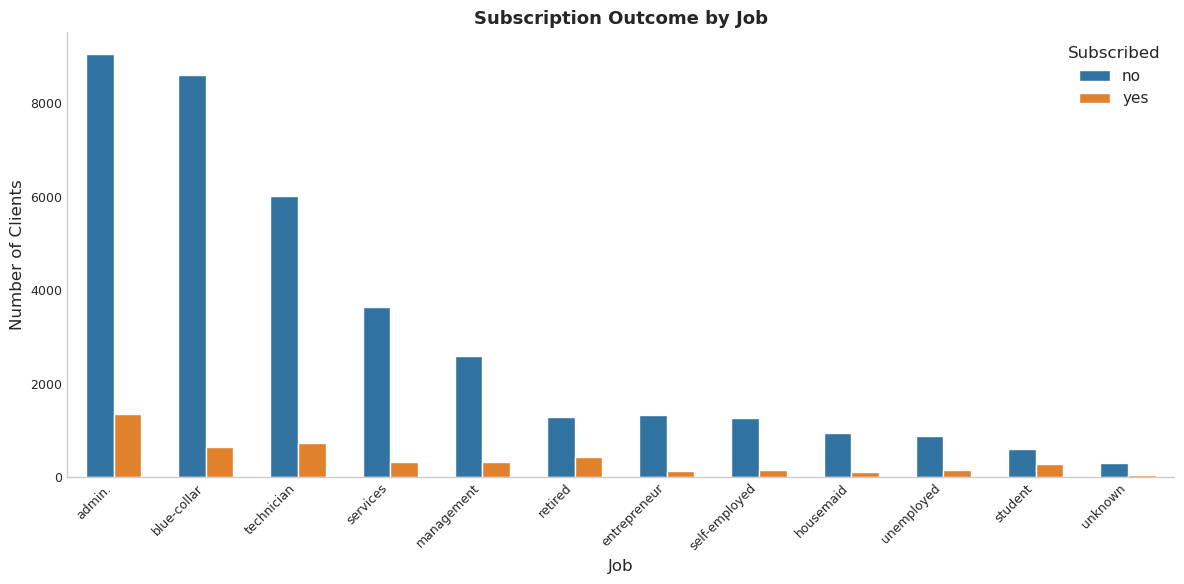

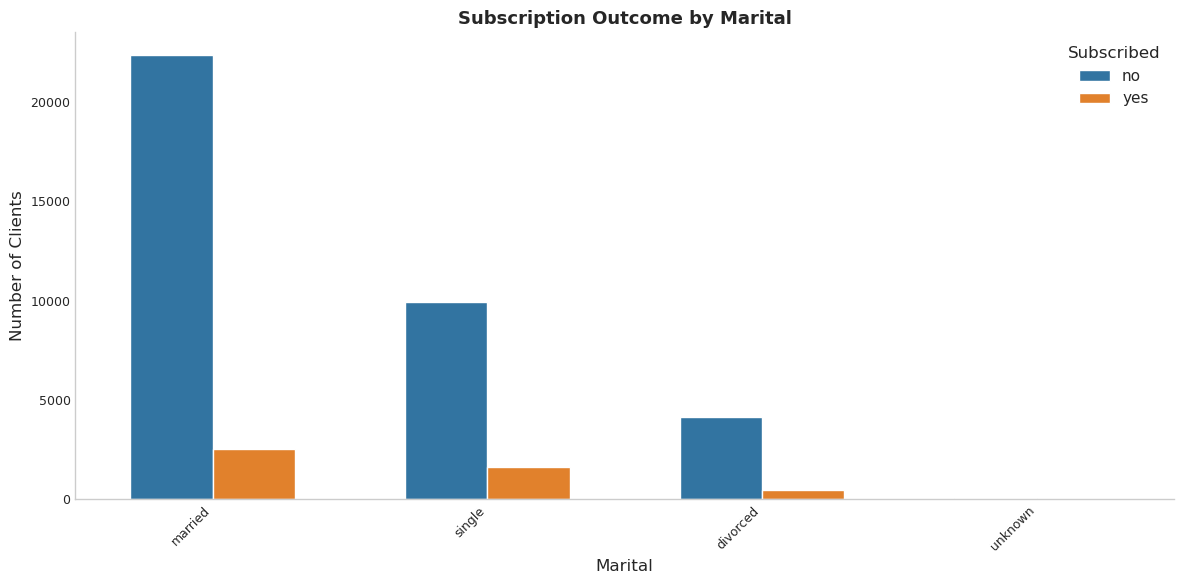

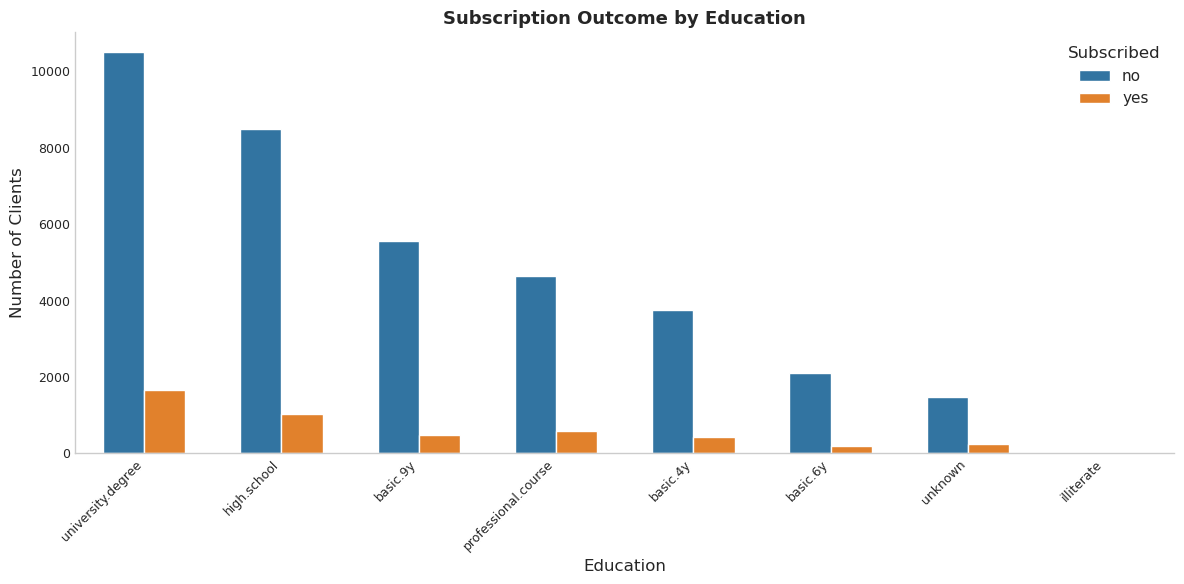

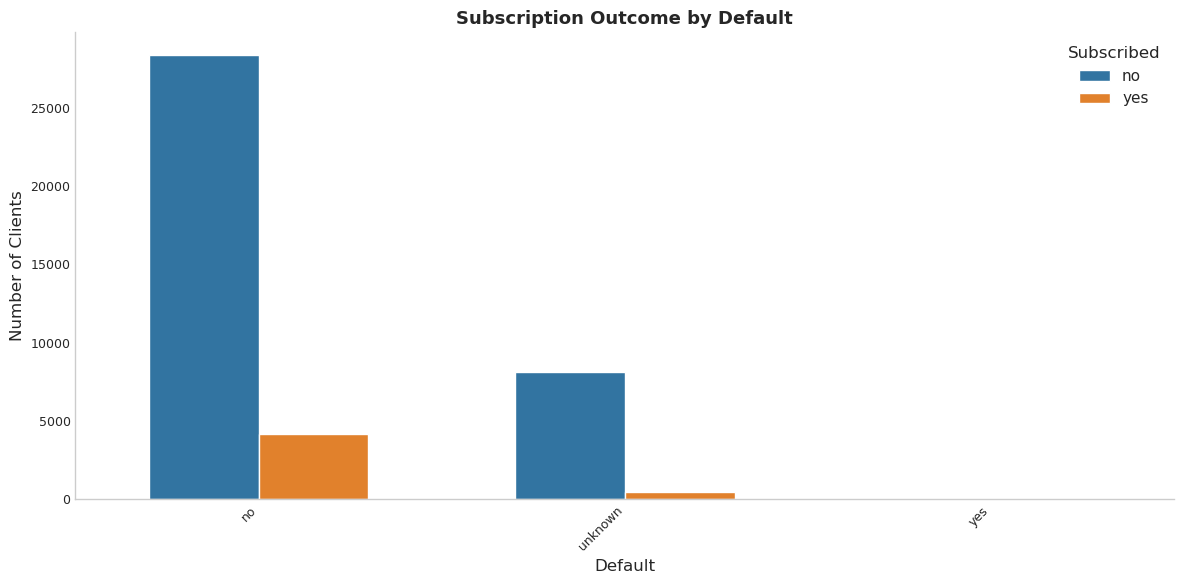

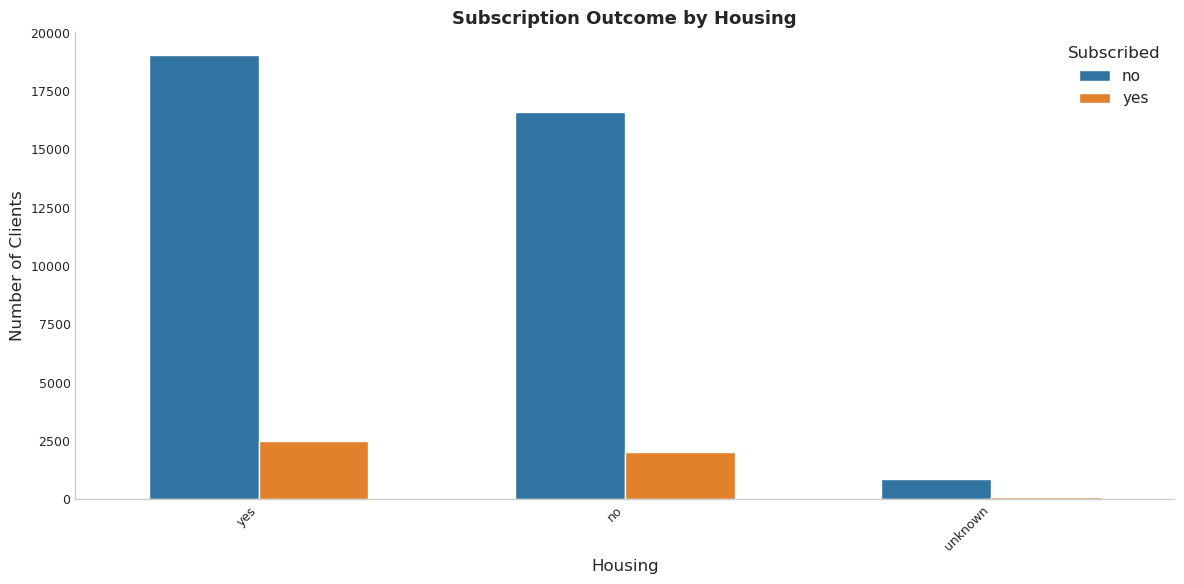

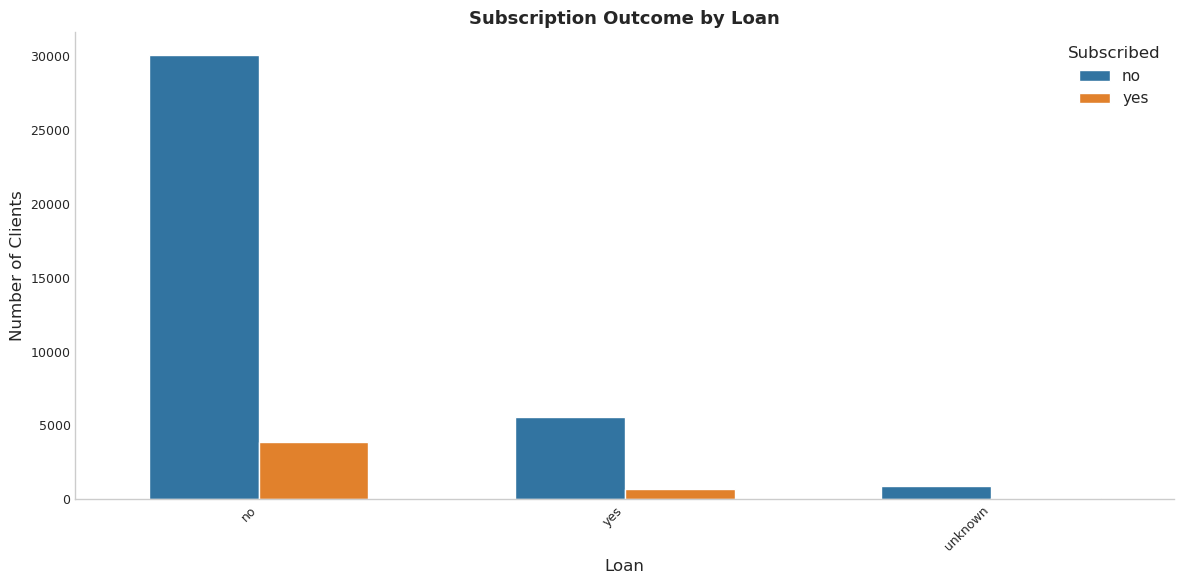

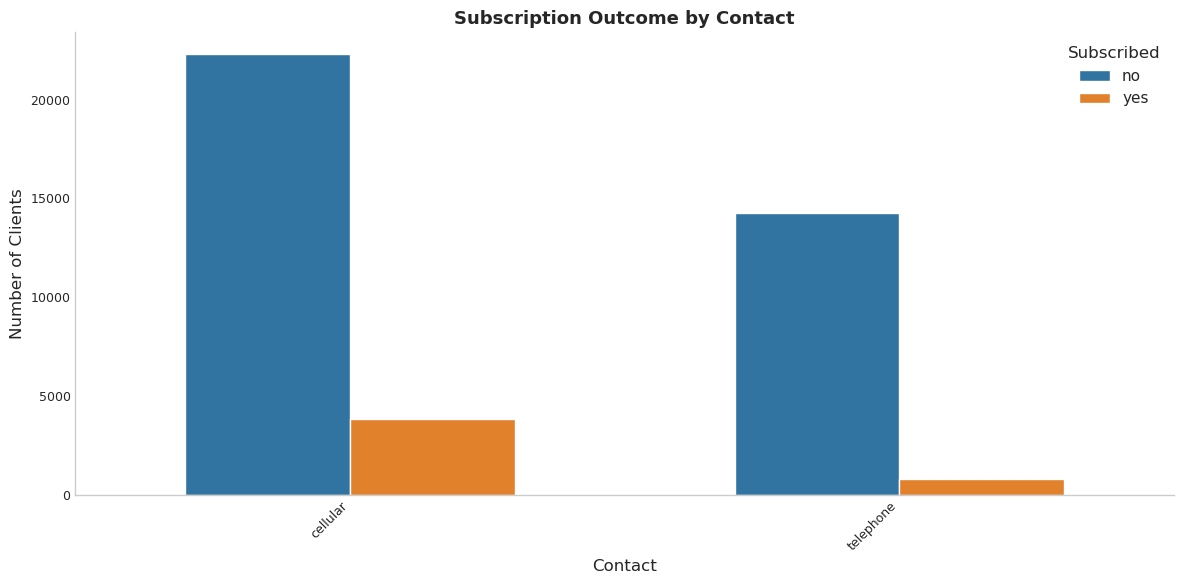

In [37]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9
})

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x=col,
        data=df,
        hue='y',
        order=df[col].value_counts().index,
        palette=['#1f77b4', '#ff7f0e'],
        width=0.6
    )
    
    ax.set_title(f'Subscription Outcome by {col.capitalize()}', fontsize=13, fontweight='bold')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Number of Clients')

    plt.xticks(rotation=45, ha='right')

    ax.grid(False)
    sns.despine()
    ax.legend(title='Subscribed', loc='upper right')
    plt.tight_layout()
    plt.show()

--- Subscription Rate (%) by Job and Contact Type ---
contact        cellular  telephone
job                               
admin.            16.26       5.86
blue-collar        9.02       4.30
entrepreneur      10.41       5.82
housemaid         12.97       5.48
management        14.41       5.28
retired           31.60       9.20
self-employed     14.45       3.79
services          10.99       4.16
student           36.36      15.20
technician        13.46       5.03
unemployed        19.84       5.33
unknown           15.48       6.79


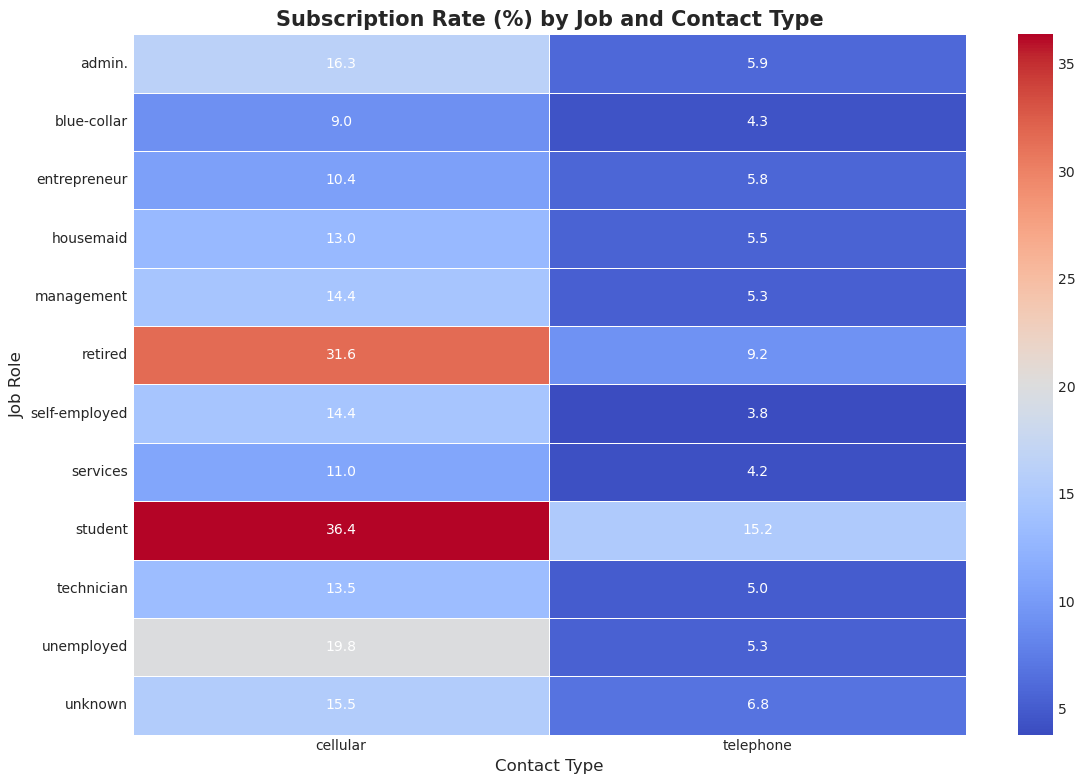

In [44]:
if 'y_numeric' not in df.columns:
    df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

interaction_pivot = df.pivot_table(
    values='y_numeric',
    index='job',
    columns='contact',
    aggfunc='mean'
) * 100

print("--- Subscription Rate (%) by Job and Contact Type ---")
print(interaction_pivot.round(2))

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    interaction_pivot,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10, "color": 'white'}
)

ax.set_title('Subscription Rate (%) by Job and Contact Type', fontsize=15, fontweight='bold')
ax.set_xlabel('Contact Type')
ax.set_ylabel('Job Role')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

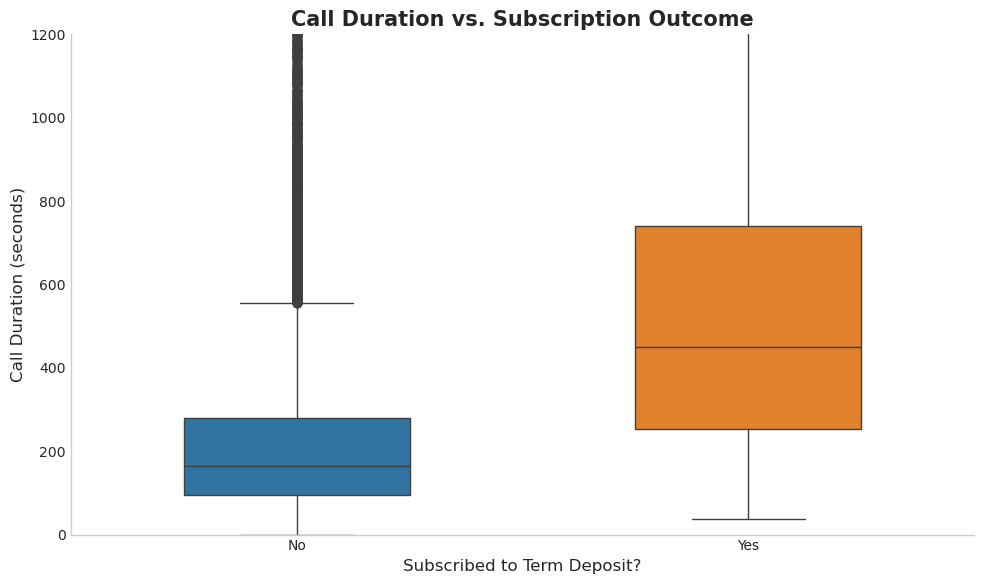

In [54]:
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='y',
    hue ='y',
    y='duration',
    data=df,
    palette=['#1f77b4', '#ff7f0e'],
    width=0.5
)

ax.set_title('Call Duration vs. Subscription Outcome', fontsize=15, fontweight='bold')
ax.set_xlabel('Subscribed to Term Deposit?', fontsize=12)
ax.set_ylabel('Call Duration (seconds)', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

ax.set_ylim(0, 1200)

ax.grid(False)
sns.despine()

plt.tight_layout()
plt.show()

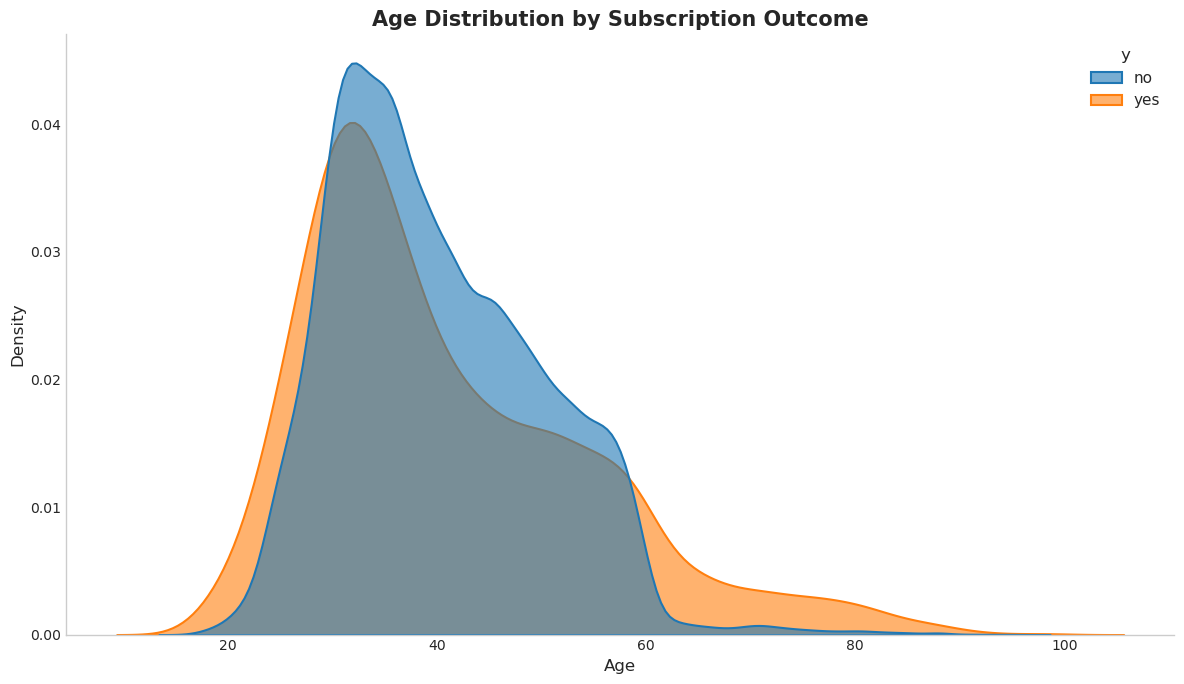

In [55]:
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

plt.figure(figsize=(12, 7))
ax = sns.kdeplot(
    data=df,
    x='age',
    hue='y',
    fill=True,
    common_norm=False,
    palette=['#1f77b4', '#ff7f0e'],
    alpha=0.6,
    linewidth=1.5
)

ax.set_title('Age Distribution by Subscription Outcome', fontsize=15, fontweight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Density')

ax.grid(False)
sns.despine()

plt.tight_layout()
plt.show()

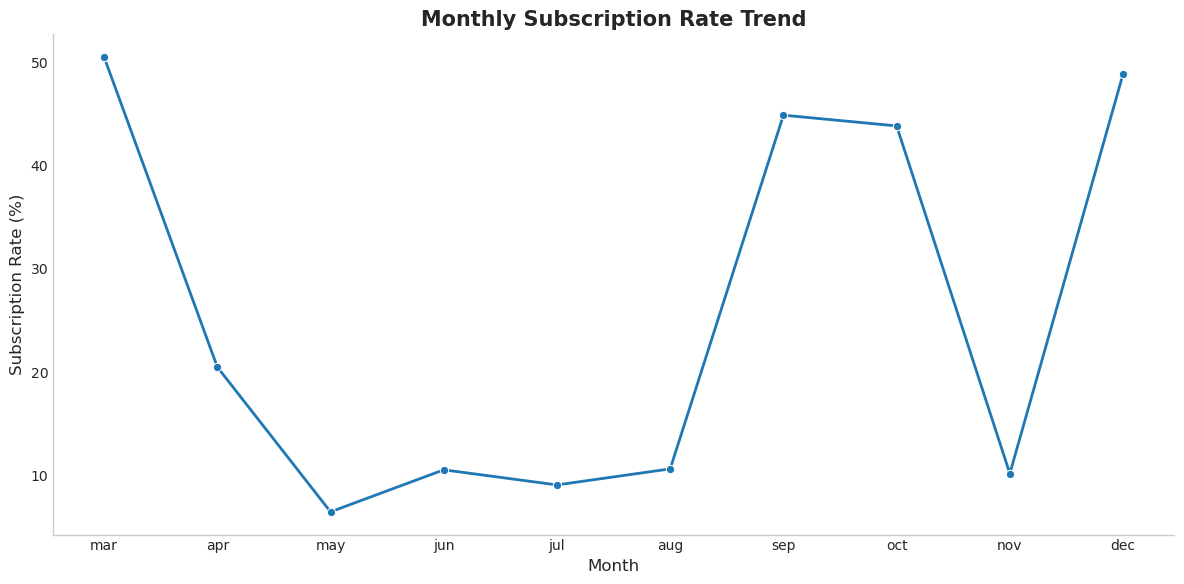

In [59]:
monthly_rate = df.groupby('month')['y_numeric'].mean().reset_index()
monthly_rate['y_numeric'] = monthly_rate['y_numeric'] * 100

month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_rate['month'] = pd.Categorical(monthly_rate['month'], categories=month_order, ordered=True)
monthly_rate = monthly_rate.sort_values('month')

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x='month',
    y='y_numeric',
    data=monthly_rate,
    marker='o',
    markersize=6,
    linewidth=2,
    color='#1f77b4'
)

ax.set_title('Monthly Subscription Rate Trend', fontsize=15, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Subscription Rate (%)')

ax.grid(False)

sns.despine()

plt.tight_layout()
plt.show()